In [56]:
#Predictive Data Analysis on Student Performance Dataset

# # **Predict Student Performance Level** 

# **Import Dependencies**

In [57]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from xgboost import cv
import matplotlib.pyplot as plt

# **Store the raw dataset into a dataframe**

In [58]:
data = pd.read_csv("../input/rawdatadigithon/Dataset1.csv")
df=data

In [59]:
#Check if the dataframe is mapped correctly
df.head()

,Unnamed: 0,ID,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Student_Performance_level
0,0,1,0.8559,5.0,7-10,No,Yes,Marathi,No,Often,...,Living_together,Yes,No,Graduation,4to<6hours,low,Yes,No,Noneoftheabove,High
1,1,2,0.8563,5.0,7-10,No,No,English,No,Regular,...,Living_together,Yes,Yes,Graduation,4to<6hours,high,Yes,Yes,Facebook,High
2,2,3,0.8320,2.0,7-10,No,No,English,No,Regular,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Instagram,High
3,3,4,0.8409,2.0,0-3,No,No,Marathi,No,Regular,...,Living_together,Yes,Yes,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,High
4,4,5,0.8487,4.0,10+,No,No,Hindi,Yes,Regular,...,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,High


# **Dataframe Metadata**

> **Data Shape**

In [60]:
df.shape

(2000000, 74)

> **Detailed Information**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 74 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Unnamed: 0                                 int64  
 1   ID                                         int64  
 2   present_days_out_off_100_instruction_days  float64
 3   Late_remark                                float64
 4   family_income                              object 
 5   CWSN                                       object 
 6   Hostel                                     object 
 7   Medium_of_Instruction                      object 
 8   Attending_Remidal_Classes                  object 
 9   SMC_Frequency                              object 
 10  PTA_Meeting_Frequency                      object 
 11  School_Toilet_Facility                     object 
 12  Playground_Availability                    object 
 13  ICT_Facility                              

> **Column Names**

In [62]:
df.columns

Index(['Unnamed: 0', 'ID', 'present_days_out_off_100_instruction_days',
       'Late_remark', 'family_income', 'CWSN', 'Hostel',
       'Medium_of_Instruction', 'Attending_Remidal_Classes', 'SMC_Frequency',
       'PTA_Meeting_Frequency', 'School_Toilet_Facility',
       'Playground_Availability', 'ICT_Facility', 'Library_Facility',
       'Dustbin_Facility', 'Electricity_Availability',
       'First_Aid_Box_Availability', 'Board_Condition',
       'Teacher_Learning_Material_Availability',
       'School_is_approach_by_all_weather_road', 'Number_Counting_1',
       'Addition_1', 'Subtraction_1', 'Multiplication_1', 'Division_1',
       'Word_Problem_1', 'Sentence_Reading_1', 'Listen_and_Writing_1',
       'Question_and_Answer_1', 'Word_Formation_1', 'Enacting_Poem_1',
       'Picture_Reading_1', 'Sentence_Formation_1', 'Story_Formation_1',
       'Drama_Presentation_1', 'confidence_1', 'Time_Telling_1',
       'Poem_Formation_1', 'General_Knowledge_1', 'Object_Drawing_1',
       'Impro

> **Dataset Description**

In [63]:
df.describe()

,Unnamed: 0,ID,present_days_out_off_100_instruction_days,Late_remark,Number_Counting_1,Addition_1,Subtraction_1,Multiplication_1,Division_1,Word_Problem_1,...,Picture_Reading_2,Sentence_Formation_2,Story_Formation_2,Drama_Presentation_2,confidence_2,Time_Telling_2,Poem_Formation_2,General_Knowledge_2,Object_Drawing_2,Impromptu_Speaking_2
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,1.000000e+06,8.066666e-01,8.059010e+00,5.803279e+00,6.000415e+00,5.592850e+00,6.004956e+00,7.399615e+00,6.499293e+00,...,6.854085e+00,9.544512e+00,6.516483e+00,6.470769e+00,6.500493e+00,6.860326e+00,6.540070e+00,6.314639e+00,6.340669e+00,6.304743e+00
std,5.773504e+05,5.773504e+05,5.454054e-02,4.184327e+00,2.085432e+00,2.191941e+00,2.129503e+00,2.411298e+00,1.847091e+00,1.040836e+00,...,2.461397e+00,7.729735e-01,2.301539e+00,1.952197e+00,1.040533e+00,2.466370e+00,2.057166e+00,2.238352e+00,2.664840e+00,2.375943e+00
min,0.000000e+00,1.000000e+00,5.513000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.999998e+05,5.000008e+05,7.739000e-01,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,...,5.000000e+00,9.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00
50%,9.999995e+05,1.000000e+06,8.107000e-01,7.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,6.000000e+00,...,7.000000e+00,1.000000e+01,7.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,6.000000e+00
75%,1.499999e+06,1.500000e+06,8.460000e-01,1.100000e+01,7.000000e+00,8.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,7.000000e+00,...,9.000000e+00,1.000000e+01,8.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,8.000000e+00
max,1.999999e+06,2.000000e+06,1.000000e+00,3.400000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.100000e+01,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01


# **Data Cleaning**

# Check for Null values percentage against every columns

In [64]:
null_count = df.isnull().sum()*100/50000
print("Column Name\tPercentage of Null Values\n")
for i,per in zip(df.columns,null_count):
    print(f"{i}\t {round(per, ndigits=4)}%")

Column Name	Percentage of Null Values

Unnamed: 0	 0.0%
ID	 0.0%
present_days_out_off_100_instruction_days	 0.0%
Late_remark	 0.0%
family_income	 0.0%
CWSN	 0.0%
Hostel	 0.0%
Medium_of_Instruction	 0.0%
Attending_Remidal_Classes	 0.0%
SMC_Frequency	 0.0%
PTA_Meeting_Frequency	 0.0%
School_Toilet_Facility	 0.0%
Playground_Availability	 0.0%
ICT_Facility	 0.0%
Library_Facility	 0.0%
Dustbin_Facility	 0.0%
Electricity_Availability	 0.0%
First_Aid_Box_Availability	 0.0%
Board_Condition	 0.0%
Teacher_Learning_Material_Availability	 0.0%
School_is_approach_by_all_weather_road	 0.0%
Number_Counting_1	 0.0%
Addition_1	 0.0%
Subtraction_1	 0.0%
Multiplication_1	 0.0%
Division_1	 0.0%
Word_Problem_1	 0.0%
Sentence_Reading_1	 0.0%
Listen_and_Writing_1	 0.0%
Question_and_Answer_1	 0.0%
Word_Formation_1	 0.0%
Enacting_Poem_1	 0.0%
Picture_Reading_1	 0.0%
Sentence_Formation_1	 0.0%
Story_Formation_1	 0.0%
Drama_Presentation_1	 0.0%
confidence_1	 0.0%
Time_Telling_1	 0.0%
Poem_Formation_1	 0.0%
Gener

* No null value found

# Check for duplicate rows

In [65]:
df.duplicated().sum()

0

* No duplicate rows

# Remove Unnecessary Columns

In [66]:
df=df.drop(labels = ['Unnamed: 0', 'ID'], axis = 1)

In [67]:
df.head()

,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,PTA_Meeting_Frequency,School_Toilet_Facility,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Student_Performance_level
0,0.8559,5.0,7-10,No,Yes,Marathi,No,Often,NotConducted,Yes,...,Living_together,Yes,No,Graduation,4to<6hours,low,Yes,No,Noneoftheabove,High
1,0.8563,5.0,7-10,No,No,English,No,Regular,Sometime,Yes,...,Living_together,Yes,Yes,Graduation,4to<6hours,high,Yes,Yes,Facebook,High
2,0.8320,2.0,7-10,No,No,English,No,Regular,Regular,Yes,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Instagram,High
3,0.8409,2.0,0-3,No,No,Marathi,No,Regular,Regular,Yes,...,Living_together,Yes,Yes,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,High
4,0.8487,4.0,10+,No,No,Hindi,Yes,Regular,Regular,Yes,...,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,High


# **Pre-Processing**

# Split Dataset into Dependant or Target Variable/s and Indpendent Variable/s

**Independent Variables**

In [68]:
X = df.iloc[:, 0:71]
X.head()

,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,PTA_Meeting_Frequency,School_Toilet_Facility,...,Location,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used
0,0.8559,5.0,7-10,No,Yes,Marathi,No,Often,NotConducted,Yes,...,Rural,Living_together,Yes,No,Graduation,4to<6hours,low,Yes,No,Noneoftheabove
1,0.8563,5.0,7-10,No,No,English,No,Regular,Sometime,Yes,...,Urban,Living_together,Yes,Yes,Graduation,4to<6hours,high,Yes,Yes,Facebook
2,0.8320,2.0,7-10,No,No,English,No,Regular,Regular,Yes,...,Urban,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Instagram
3,0.8409,2.0,0-3,No,No,Marathi,No,Regular,Regular,Yes,...,Urban,Living_together,Yes,Yes,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove
4,0.8487,4.0,10+,No,No,Hindi,Yes,Regular,Regular,Yes,...,Urban,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove


**Target Variable**

In [69]:
Y = df.iloc[:,-1:]
Y.head()

,Student_Performance_level
0,High
1,High
2,High
3,High
4,High


# Label Encoding of Categorical Features

In [70]:
categorical_features = (X.select_dtypes(include=['object']).columns.values)
categorical_features

array(['family_income', 'CWSN', 'Hostel', 'Medium_of_Instruction',
       'Attending_Remidal_Classes', 'SMC_Frequency',
       'PTA_Meeting_Frequency', 'School_Toilet_Facility',
       'Playground_Availability', 'ICT_Facility', 'Library_Facility',
       'Dustbin_Facility', 'Electricity_Availability',
       'First_Aid_Box_Availability', 'Board_Condition',
       'Teacher_Learning_Material_Availability',
       'School_is_approach_by_all_weather_road', 'Location',
       'Parent_Status', 'Father_working', 'Mother_working',
       'Mother_Education', 'Study_Time_per_day', 'free_Time_After_School',
       'wants_to_take_higher_education', 'Internet_access_at_home',
       'Type_of_social_media_used'], dtype=object)

In [71]:
my_label = preprocessing.LabelEncoder()

In [72]:
for i in categorical_features:
    new_column = i + '_enc'
    X[new_column] = 0
    my_label.fit(X[i])
    X[new_column] = my_label.transform(X[i])
    X=X.drop(columns=[i])

> # Label Encoded Dataframe

In [73]:
X.head()

,present_days_out_off_100_instruction_days,Late_remark,Number_Counting_1,Addition_1,Subtraction_1,Multiplication_1,Division_1,Word_Problem_1,Sentence_Reading_1,Listen_and_Writing_1,...,Location_enc,Parent_Status_enc,Father_working_enc,Mother_working_enc,Mother_Education_enc,Study_Time_per_day_enc,free_Time_After_School_enc,wants_to_take_higher_education_enc,Internet_access_at_home_enc,Type_of_social_media_used_enc
0,0.8559,5.0,5.0,9.0,9.0,8.0,5.0,6,10.0,8.0,...,0,1,1,0,0,2,1,1,0,2
1,0.8563,5.0,8.0,10.0,9.0,10.0,10.0,8,10.0,6.0,...,1,1,1,1,0,2,0,1,1,0
2,0.8320,2.0,8.0,7.0,5.0,7.0,4.0,5,10.0,5.0,...,1,1,1,0,0,2,2,1,1,1
3,0.8409,2.0,6.0,8.0,5.0,9.0,10.0,8,10.0,8.0,...,1,1,1,1,0,2,2,1,1,2
4,0.8487,4.0,6.0,8.0,8.0,8.0,8.0,6,10.0,7.0,...,1,1,0,0,0,2,2,1,1,2


In [74]:
my_label.fit(Y["Student_Performance_level"])
Y["Student_Performance_level"]=my_label.transform(Y["Student_Performance_level"])
Y.head()

,Student_Performance_level
0,0
1,0
2,0
3,0
4,0


# **Feature Selection**

# Variance Filter using VarianceThreshold Function

In [75]:
constant_filter = VarianceThreshold(threshold=0.15)
constant_filter.fit(X)

VarianceThreshold(threshold=0.15)

In [76]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]
constant_columns

['present_days_out_off_100_instruction_days', 'CWSN_enc']

**Drop Columns with Low Variance**

In [77]:
X=X.drop(columns=constant_columns)
X.head()

,Late_remark,Number_Counting_1,Addition_1,Subtraction_1,Multiplication_1,Division_1,Word_Problem_1,Sentence_Reading_1,Listen_and_Writing_1,Question_and_Answer_1,...,Location_enc,Parent_Status_enc,Father_working_enc,Mother_working_enc,Mother_Education_enc,Study_Time_per_day_enc,free_Time_After_School_enc,wants_to_take_higher_education_enc,Internet_access_at_home_enc,Type_of_social_media_used_enc
0,5.0,5.0,9.0,9.0,8.0,5.0,6,10.0,8.0,7.0,...,0,1,1,0,0,2,1,1,0,2
1,5.0,8.0,10.0,9.0,10.0,10.0,8,10.0,6.0,4.0,...,1,1,1,1,0,2,0,1,1,0
2,2.0,8.0,7.0,5.0,7.0,4.0,5,10.0,5.0,6.0,...,1,1,1,0,0,2,2,1,1,1
3,2.0,6.0,8.0,5.0,9.0,10.0,8,10.0,8.0,7.0,...,1,1,1,1,0,2,2,1,1,2
4,4.0,6.0,8.0,8.0,8.0,8.0,6,10.0,7.0,6.0,...,1,1,0,0,0,2,2,1,1,2


# Pearson Correlation

In [78]:
def handling_correlation(X,threshold=0.8):
    corr_features = set()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [79]:
train=X.copy()
handling_correlation(train,threshold=0.6)

['Word_Problem_1',
 'confidence_2',
 'Object_Drawing_1',
 'Object_Drawing_2',
 'confidence_1',
 'Word_Problem_2']

> Note: There are very few columns with Pearson Correlation>0.6, hence we will ignoring feature selection based on correlation

# **Splitting the data for training, testing and validation**

In [80]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, Y, test_size=0.3)
X_val,X_test,y_val,y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5)

* The dataset has been split into 70% Training data, 30% Testing data out of which 50% is Validation data

> # Heatmap for X_train

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

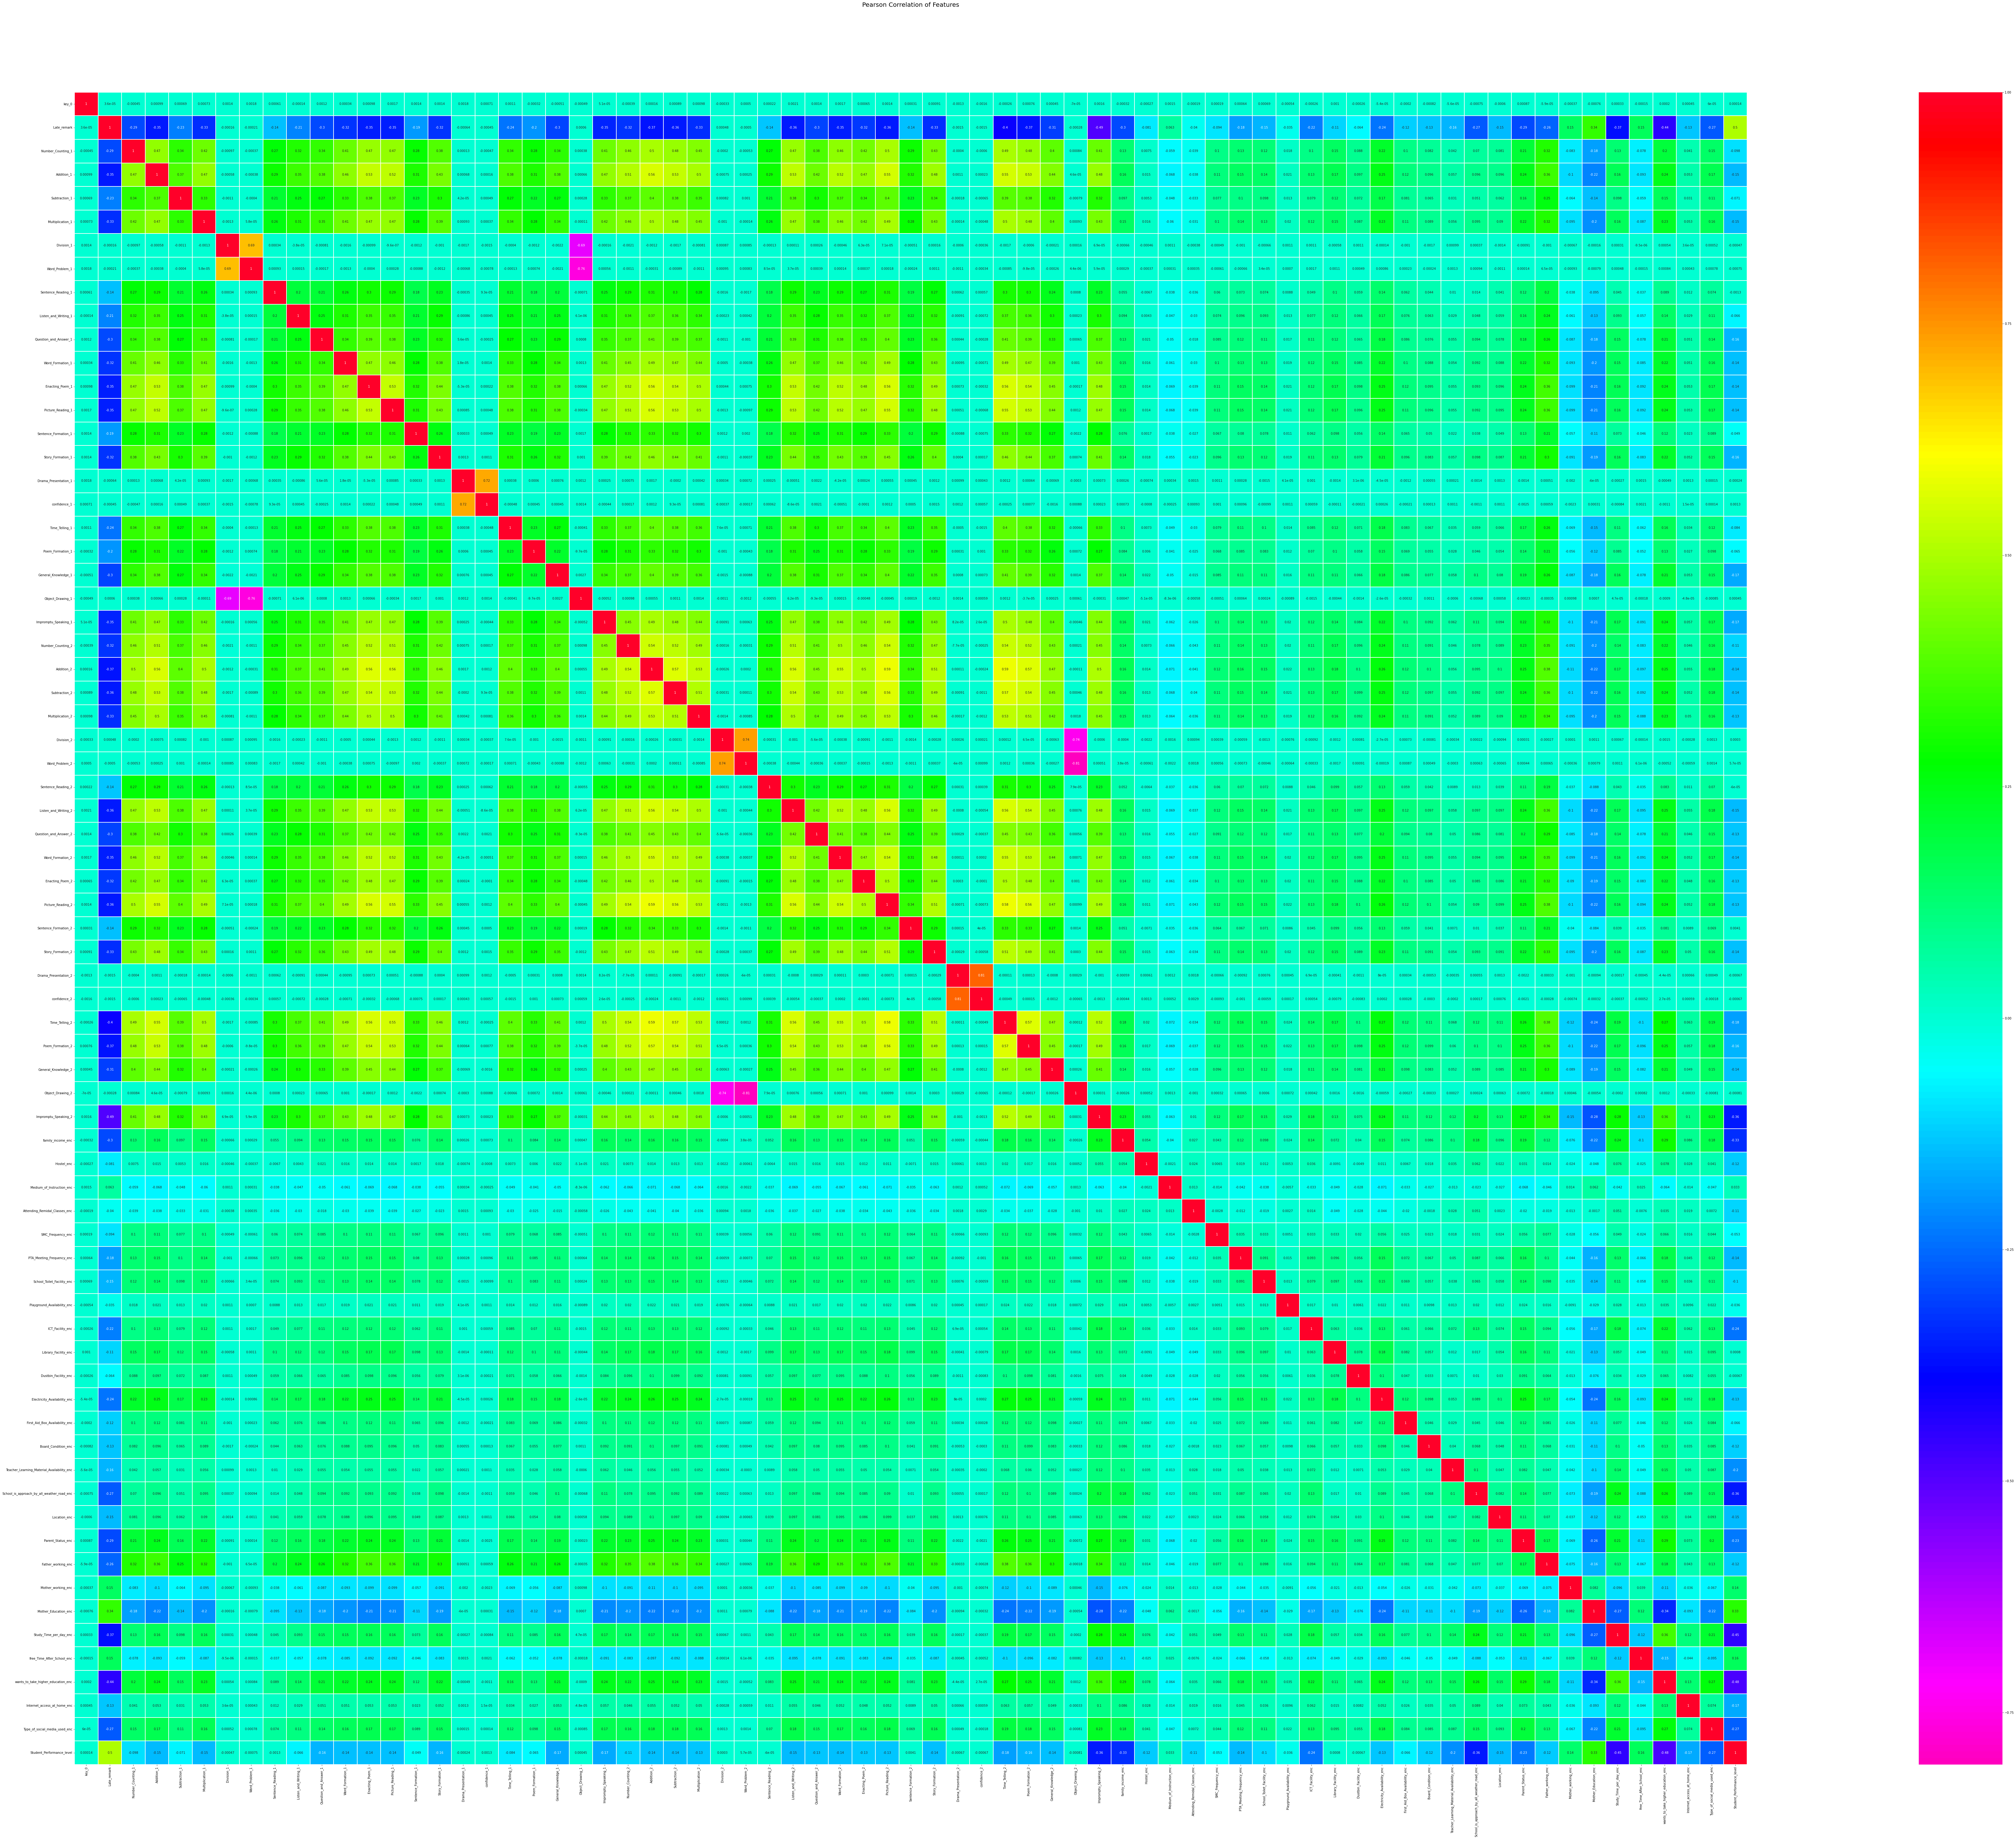

In [81]:
colormap = plt.cm.RdBu
plt.figure(figsize=(200,100))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

# Model Evaluation Matrix

In [82]:
#Initialize Legends
Accuracy_score = []
F1_Score = []
Algorithm = []

> # Logistic Regression

In [83]:
Algorithm.append('LogisticRegression')
clf = LogisticRegression().fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [84]:
print("Accuracy Score for Train data:  ", accuracy_score(y_test, predicted))
print("F1 Score for Train data:  ", f1_score(y_test, predicted))

Accuracy Score for Train data:   0.9164333333333333
F1 Score for Train data:   0.733784989168755


In [85]:
predict_test= clf.predict(X_val)
print("Accuracy Score for Validation data:  ", accuracy_score(y_val, predict_test))
print("F1 Score for Validation data:  ", f1_score(y_val, predict_test))

Accuracy Score for Validation data:   0.91703
F1 Score for Validation data:   0.7338287975191146


In [86]:
Accuracy_score.append(accuracy_score(y_test, predicted))
F1_Score.append(f1_score(y_test, predicted))

> # Decision Tree Classifier 

In [88]:
Algorithm.append('Decision Tree Classifier')
dsclf = DecisionTreeClassifier()
dsclf.fit(X_train, y_train.values.ravel())
dspredicted= dsclf.predict(X_test)

In [89]:
print("Accuracy Score for Train data:  ", accuracy_score(y_test, dspredicted))
print("F1 Score for Train data:  ", f1_score(y_test, dspredicted))

Accuracy Score for Train data:   0.8824866666666666
F1 Score for Train data:   0.6645670789724073


In [90]:
dspredict_test= dsclf.predict(X_val)
print("Accuracy Score for Validation data:  ", accuracy_score(y_val, dspredict_test))
print("F1 Score for Validation data:  ", f1_score(y_val, dspredict_test))

Accuracy Score for Validation data:   0.8839266666666666
F1 Score for Validation data:   0.6655332718610727


In [91]:
Accuracy_score.append(accuracy_score(y_test, dspredicted))
F1_Score.append(f1_score(y_test, dspredicted))

> # Random Forest Classifier

In [92]:
Algorithm.append('Random Forest Classifier')
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train.values.ravel())
rfpredicted= rfclf.predict(X_test)

In [93]:
print("Accuracy Score for Train data:  ", accuracy_score(y_test, rfpredicted))
print("F1 Score for Train data:  ", f1_score(y_test, rfpredicted))

Accuracy Score for Train data:   0.93403
F1 Score for Train data:   0.7714005197805371


In [94]:
rfpredict_test= rfclf.predict(X_val)
print("Accuracy Score for Validation data:  ", accuracy_score(y_val, rfpredict_test))
print("F1 Score for Validation data:  ", f1_score(y_val, rfpredict_test))

Accuracy Score for Validation data:   0.9347633333333333
F1 Score for Validation data:   0.7721997835019148


In [95]:
Accuracy_score.append(accuracy_score(y_test, rfpredicted))
F1_Score.append(f1_score(y_test, rfpredicted))

> # XG Boost Classifier

In [96]:
Algorithm.append('XGB Classifier')
xgbclf = xgb.XGBClassifier()
xgbclf.fit(X_train, y_train.values.ravel())
xgbpredicted = xgbclf.predict(X_test)

In [97]:
print("Accuracy Score for Train data:  ", accuracy_score(y_test, xgbpredicted))
print("F1 Score for Train data:  ", f1_score(y_test, xgbpredicted))

Accuracy Score for Train data:   0.9373866666666667
F1 Score for Train data:   0.790193231319111


In [98]:
xgbpredict_test= xgbclf.predict(X_val)
print("Accuracy Score for Validation data:  ", accuracy_score(y_val, xgbpredict_test))
print("F1 Score for Validation data:  ", f1_score(y_val, xgbpredict_test))

Accuracy Score for Validation data:   0.93807
F1 Score for Validation data:   0.7909959164388648


In [99]:
Accuracy_score.append(accuracy_score(y_test, xgbpredicted))
F1_Score.append(f1_score(y_test, xgbpredicted))

# Final Evaluation Matrix

In [100]:
pd.DataFrame({'Algorithms':Algorithm,'Accuracy Scores':Accuracy_score,'F1 Score':F1_Score})

,Algorithms,Accuracy Scores,F1 Score
0,LogisticRegression,0.916433,0.733785
1,Decision Tree Classifier,0.882487,0.664567
2,Random Forest Classifier,0.934030,0.771401
3,XGB Classifier,0.937387,0.790193


# Detailed Evaluation of Models based on Confusion Matrix and Classification Report

> # Confusion Matrix

In [101]:
print("-----Confusion Matrix------")

print("-----Logistic regression------ ")
print(confusion_matrix(y_test, predicted))

print("------Decision Tree Classifier------ ")
print(confusion_matrix(y_test, dspredicted))

print("------Random Forest Classifier------ ")
print(confusion_matrix(y_test, rfpredicted))

print("------XG Boost Classifier------ ")
print(confusion_matrix(y_test, xgbpredicted))

-----Confusion Matrix------
-----Logistic regression------ 
[[240379   7995]
 [ 17075  34551]]
------Decision Tree Classifier------ 
[[229823  18551]
 [ 16703  34923]]
------Random Forest Classifier------ 
[[246817   1557]
 [ 18234  33392]]
------XG Boost Classifier------ 
[[245843   2531]
 [ 16253  35373]]


> # Classification Report

In [102]:
print("-----Classification Report------")

print("-----Logistic regression------ ")
print(classification_report(y_test, predicted))

print("------Decision Tree Classifier------ ")
print(classification_report(y_test, dspredicted))

print("------Random Forest Classifier------ ")
print(classification_report(y_test, rfpredicted))

print("------XG Boost Classifier------ ")
print(classification_report(y_test, xgbpredicted))

-----Classification Report------
-----Logistic regression------ 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    248374
           1       0.81      0.67      0.73     51626

    accuracy                           0.92    300000
   macro avg       0.87      0.82      0.84    300000
weighted avg       0.91      0.92      0.91    300000

------Decision Tree Classifier------ 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    248374
           1       0.65      0.68      0.66     51626

    accuracy                           0.88    300000
   macro avg       0.79      0.80      0.80    300000
weighted avg       0.88      0.88      0.88    300000

------Random Forest Classifier------ 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    248374
           1       0.96      0.65      0.77     51626

    accuracy                           0.

# Evaluation Summary

Based on Evaluation matrix, confusion matrix and evaluation report, best model to use is **XGBoost Classification**.

# **Final Training with XGB Classification Model**

> # Model Training

In [103]:
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

xgbclffinal = xgb.XGBClassifier()
print(xgbclffinal)
xgbclffinal.fit(X_train, y_train.values.ravel())
xgbpredictedfinal = xgbclffinal.predict(X_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)


> # Model Evaluation

* # Training Data Metrics

In [104]:
print("Accuracy Score for Train data:  ", accuracy_score(y_test, xgbpredictedfinal))
print("F1 Score for Train data:  ", f1_score(y_test, xgbpredictedfinal))

Accuracy Score for Train data:   0.9373866666666667
F1 Score for Train data:   0.790193231319111


* # Validation Data Metrics

In [105]:
xgbpredict_test= xgbclffinal.predict(X_val)
print("Accuracy Score for Validation data:  ", accuracy_score(y_val, xgbpredict_test))
print("F1 Score for Validation data:  ", f1_score(y_val, xgbpredict_test))

Accuracy Score for Validation data:   0.93807
F1 Score for Validation data:   0.7909959164388648


* # Confusion Matrix

In [106]:
print(confusion_matrix(y_test, xgbpredictedfinal))

[[245843   2531]
 [ 16253  35373]]


* # Classification report

In [107]:
print(classification_report(y_test, xgbpredictedfinal))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    248374
           1       0.93      0.69      0.79     51626

    accuracy                           0.94    300000
   macro avg       0.94      0.84      0.88    300000
weighted avg       0.94      0.94      0.93    300000



* # K-Fold Cross-Validation

In [108]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [109]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.908223,0.000144,0.908131,0.000256
1,0.928323,0.008518,0.927970,0.008680
2,0.935144,0.000822,0.935054,0.000890
3,0.937545,0.000866,0.937492,0.000884
4,0.938882,0.000391,0.938821,0.000451


# **Feature Importance**

<Figure size 7200x3600 with 0 Axes>

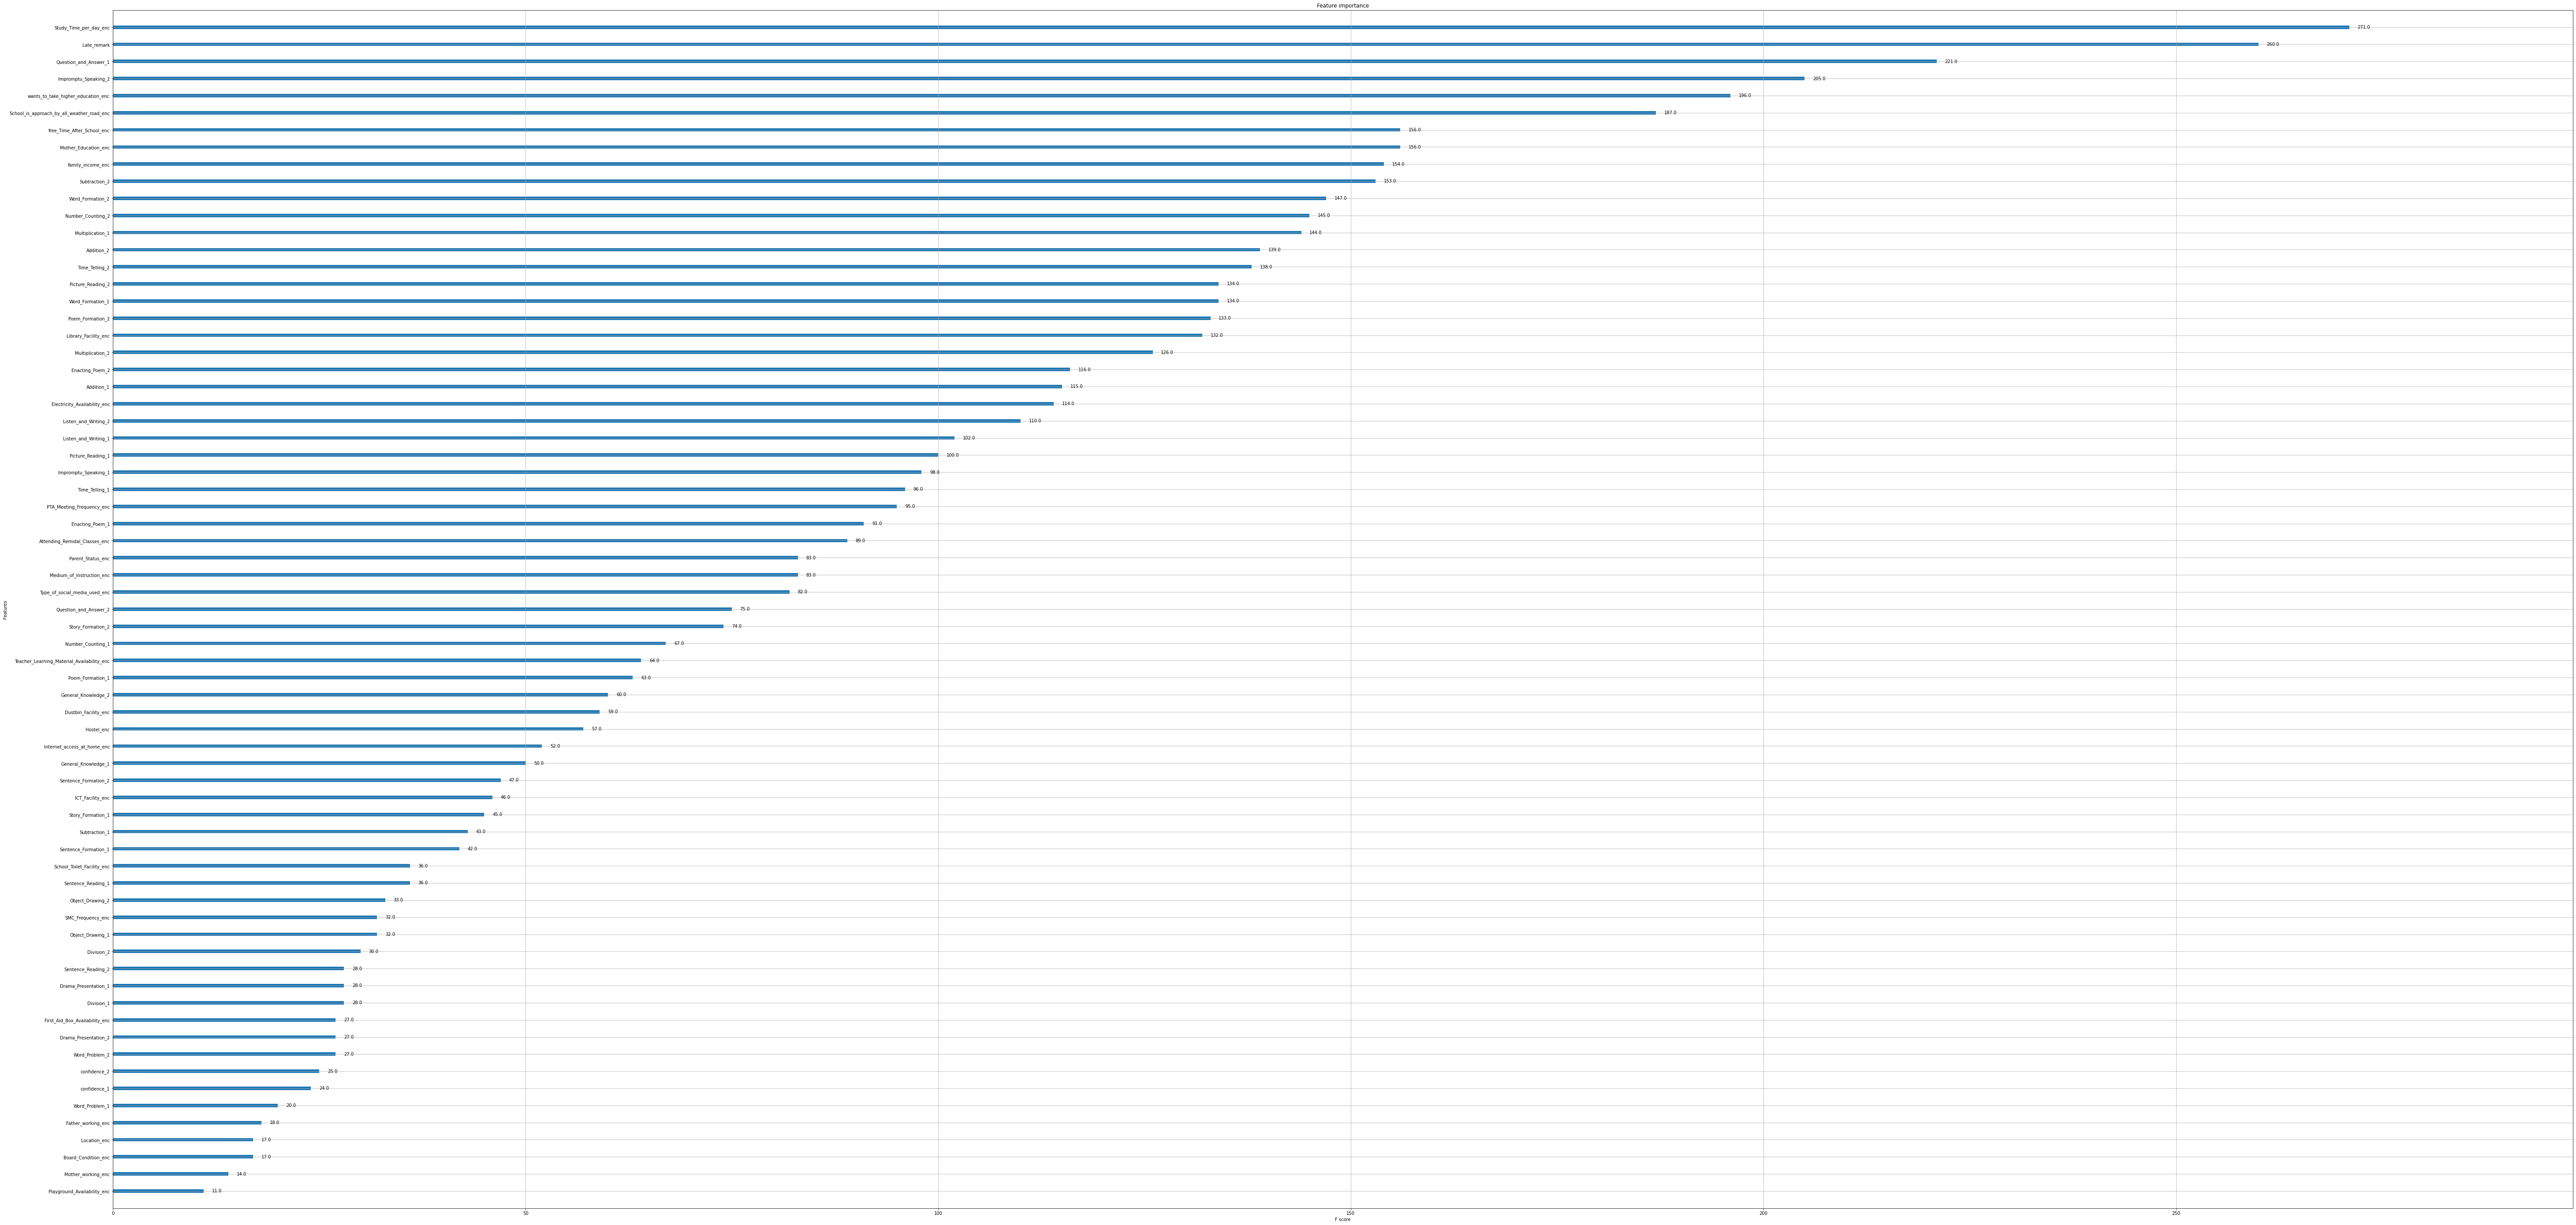

In [111]:
plt.figure(figsize=(100,50))
xgb.plot_importance(xgbclffinal)
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

# **Test Data Prediction**

> # Fetch Test Dataset

In [122]:
tdf = pd.read_csv("../input/testdata/Test_Dataset.csv")
tdf.head()

,ID,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,PTA_Meeting_Frequency,...,Location,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used
0,1,0.7997,4.0,3-7,No,No,Gujarati,No,Regular,Sometime,...,Urban,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove
1,2,0.8641,5.0,7-10,No,Yes,Bengali,No,NotConducted,Regular,...,Rural,Living_together,Yes,No,Higher_Secondary,6+hours,moderate,Yes,No,Noneoftheabove
2,3,0.8809,4.0,7-10,Yes,No,Hindi,No,Regular,Regular,...,Rural,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove
3,4,0.9055,4.0,7-10,No,No,English,No,Often,Regular,...,Urban,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove
4,5,0.8903,4.0,7-10,No,No,Hindi,No,Often,Regular,...,Rural,Living_together,Yes,No,Graduation,4to<6hours,veryhigh,Yes,Yes,Facebook


> # Check for null values and duplicate rows

In [123]:
null_count = tdf.isnull().sum()*100/50000
print("Column Name\tPercentage of Null Values\n")
for i,per in zip(tdf.columns,null_count):
    print(f"{i}\t {round(per, ndigits=4)}%")

Column Name	Percentage of Null Values

ID	 0.0%
present_days_out_off_100_instruction_days	 0.0%
Late_remark	 0.0%
family_income	 0.0%
CWSN	 0.0%
Hostel	 0.0%
Medium_of_Instruction	 0.0%
Attending_Remidal_Classes	 0.0%
SMC_Frequency	 0.0%
PTA_Meeting_Frequency	 0.0%
School_Toilet_Facility	 0.0%
Playground_Availability	 0.0%
ICT_Facility	 0.0%
Library_Facility	 0.0%
Dustbin_Facility	 0.0%
Electricity_Availability	 0.0%
First_Aid_Box_Availability	 0.0%
Board_Condition	 0.0%
Teacher_Learning_Material_Availability	 0.0%
School_is_approach_by_all_weather_road	 0.0%
Number_Counting_1	 0.0%
Addition_1	 0.0%
Subtraction_1	 0.0%
Multiplication_1	 0.0%
Division_1	 0.0%
Word_Problem_1	 0.0%
Sentence_Reading_1	 0.0%
Listen_and_Writing_1	 0.0%
Question_and_Answer_1	 0.0%
Word_Formation_1	 0.0%
Enacting_Poem_1	 0.0%
Picture_Reading_1	 0.0%
Sentence_Formation_1	 0.0%
Story_Formation_1	 0.0%
Drama_Presentation_1	 0.0%
confidence_1	 0.0%
Time_Telling_1	 0.0%
Poem_Formation_1	 0.0%
General_Knowledge_1	 0

In [124]:
tdf.duplicated().sum()

0

> # Data Cleaning

In [125]:
tdf=tdf.drop(labels = ['ID'], axis = 1)

In [126]:
tdf.head()

,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,PTA_Meeting_Frequency,School_Toilet_Facility,...,Location,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used
0,0.7997,4.0,3-7,No,No,Gujarati,No,Regular,Sometime,Yes,...,Urban,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove
1,0.8641,5.0,7-10,No,Yes,Bengali,No,NotConducted,Regular,Yes,...,Rural,Living_together,Yes,No,Higher_Secondary,6+hours,moderate,Yes,No,Noneoftheabove
2,0.8809,4.0,7-10,Yes,No,Hindi,No,Regular,Regular,Yes,...,Rural,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove
3,0.9055,4.0,7-10,No,No,English,No,Often,Regular,No,...,Urban,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove
4,0.8903,4.0,7-10,No,No,Hindi,No,Often,Regular,Yes,...,Rural,Living_together,Yes,No,Graduation,4to<6hours,veryhigh,Yes,Yes,Facebook


> # Pre-Processing

In [127]:
categorical_features = (tdf.select_dtypes(include=['object']).columns.values)
for i in categorical_features:
    new_column = i + '_enc'
    tdf[new_column] = 0
    my_label.fit(tdf[i])
    tdf[new_column] = my_label.transform(tdf[i])
    tdf=tdf.drop(columns=[i])

In [128]:
constant_columns =['present_days_out_off_100_instruction_days', 'CWSN_enc']
tdf=tdf.drop(columns=constant_columns)

In [129]:
tdf.head()

,Late_remark,Number_Counting_1,Addition_1,Subtraction_1,Multiplication_1,Division_1,Word_Problem_1,Sentence_Reading_1,Listen_and_Writing_1,Question_and_Answer_1,...,Location_enc,Parent_Status_enc,Father_working_enc,Mother_working_enc,Mother_Education_enc,Study_Time_per_day_enc,free_Time_After_School_enc,wants_to_take_higher_education_enc,Internet_access_at_home_enc,Type_of_social_media_used_enc
0,4.0,8,8,8,7,8.0,7,10,8,7,...,1,1,1,0,0,2,2,1,1,2
1,5.0,6,6,8,9,9.0,8,10,7,8,...,0,1,1,0,1,3,2,1,0,2
2,4.0,6,8,4,8,5.0,5,10,4,7,...,0,1,1,0,0,2,2,1,0,2
3,4.0,7,6,7,8,5.0,7,10,8,8,...,1,1,0,0,0,2,2,1,0,2
4,4.0,9,9,7,5,9.0,7,10,5,6,...,0,1,1,0,0,2,3,1,1,0


# Prediction on Test dataset using trained model

In [130]:
xgbpredictedfinal = xgbclffinal.predict(tdf)

In [131]:
xgbpredictedfinal = pd.Series(xgbpredictedfinal,name='Student_Performance_level')
xgbpredictedfinal

0         0
1         0
2         0
3         0
4         0
         ..
399995    0
399996    0
399997    0
399998    0
399999    0
Name: Student_Performance_level, Length: 400000, dtype: int64

In [132]:
xgbpredictedfinal.value_counts()

0    332071
1     67929
Name: Student_Performance_level, dtype: int64

# Generating CSV

In [133]:
tdf1 = pd.read_csv("../input/testdata/Test_Dataset.csv")

In [134]:
Final=tdf1.merge(xgbpredictedfinal,left_index=True, right_index=True)
Final

,ID,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,PTA_Meeting_Frequency,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Student_Performance_level
0,1,0.7997,4.0,3-7,No,No,Gujarati,No,Regular,Sometime,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,0
1,2,0.8641,5.0,7-10,No,Yes,Bengali,No,NotConducted,Regular,...,Living_together,Yes,No,Higher_Secondary,6+hours,moderate,Yes,No,Noneoftheabove,0
2,3,0.8809,4.0,7-10,Yes,No,Hindi,No,Regular,Regular,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove,0
3,4,0.9055,4.0,7-10,No,No,English,No,Often,Regular,...,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove,0
4,5,0.8903,4.0,7-10,No,No,Hindi,No,Often,Regular,...,Living_together,Yes,No,Graduation,4to<6hours,veryhigh,Yes,Yes,Facebook,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399996,0.8372,6.0,7-10,No,No,English,No,Regular,Often,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,0
399996,399997,0.8868,2.0,7-10,No,No,English,No,Regular,Regular,...,Living_together,Yes,No,Graduation,4to<6hours,high,No,No,Noneoftheabove,0
399997,399998,0.8312,5.0,10+,No,No,Hindi,No,Regular,Regular,...,Living_together,Yes,Yes,Upper_Primary,1-<2hours,moderate,Yes,Yes,Noneoftheabove,0
399998,399999,0.7930,9.0,7-10,No,No,English,Yes,Sometime,Often,...,Living_together,Yes,Yes,Higher_Secondary,2to<4hours,moderate,Yes,Yes,Facebook,0


In [135]:
Final['Student_Performance_level']=Final['Student_Performance_level'].replace(0,'High')
Final['Student_Performance_level']=Final['Student_Performance_level'].replace(1,'Low')
Final['Student_Performance_level'].value_counts()

High    332071
Low      67929
Name: Student_Performance_level, dtype: int64

In [136]:
Final.head()

,ID,present_days_out_off_100_instruction_days,Late_remark,family_income,CWSN,Hostel,Medium_of_Instruction,Attending_Remidal_Classes,SMC_Frequency,PTA_Meeting_Frequency,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Student_Performance_level
0,1,0.7997,4.0,3-7,No,No,Gujarati,No,Regular,Sometime,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,Yes,Noneoftheabove,High
1,2,0.8641,5.0,7-10,No,Yes,Bengali,No,NotConducted,Regular,...,Living_together,Yes,No,Higher_Secondary,6+hours,moderate,Yes,No,Noneoftheabove,High
2,3,0.8809,4.0,7-10,Yes,No,Hindi,No,Regular,Regular,...,Living_together,Yes,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove,High
3,4,0.9055,4.0,7-10,No,No,English,No,Often,Regular,...,Living_together,No,No,Graduation,4to<6hours,moderate,Yes,No,Noneoftheabove,High
4,5,0.8903,4.0,7-10,No,No,Hindi,No,Often,Regular,...,Living_together,Yes,No,Graduation,4to<6hours,veryhigh,Yes,Yes,Facebook,High


In [137]:
Final.to_csv('/kaggle/working/PredictedOutput.csv')

# End of Analysis